In [1]:
import pandas as pd
import numpy as np

In [7]:
df_event = pd.read_csv(r"C:\Users\Sandeep Gowda\events_data.csv")
df_weather = pd.read_csv(r"C:\Users\Sandeep Gowda\weather_data.csv")
df_traffic = pd.read_csv(r"C:\Users\Sandeep Gowda\traffic_data.csv")
df_uber_rides = pd.read_csv(r"C:\Users\Sandeep Gowda\uber_rides_data.csv")

In [5]:
df_event.head()

,date,event_name,event_location
0,2023-01-01,NaN,NaN
1,2023-01-02,Parade,City Center
2,2023-01-03,Concert,City Center
3,2023-01-04,Concert,City Center
4,2023-01-05,NaN,Stadium


In [6]:
df_weather.head()

,timestamp,temperature_C,precipitation_mm,humidity_%,wind_speed_kmph
0,2023-01-01 00:00:00,23.2,0.2,74,14.1
1,2023-01-01 01:00:00,34.6,0.0,88,15.3
2,2023-01-01 02:00:00,17.2,5.0,64,14.8
3,2023-01-01 03:00:00,23.0,0.2,63,18.3
4,2023-01-01 04:00:00,34.4,0.2,51,7.8


In [8]:
df_traffic.head()

,timestamp,congestion_index,avg_speed_kmph
0,2023-01-01 00:00:00,46.22,46.66
1,2023-01-01 01:00:00,86.55,36.34
2,2023-01-01 02:00:00,71.24,19.40
3,2023-01-01 03:00:00,61.91,37.12
4,2023-01-01 04:00:00,30.92,36.31


In [9]:
df_uber_rides.head()

,ride_id,start_time,end_time,pickup_location,drop_location,distance_km,fare_base,fare_per_km,fare_per_min,trip_duration_min,surge_multiplier,fare_estimated
0,1,2023-01-12 12:00:00,2023-01-03 11:47:00,Airport,City Center,21.36,2.5,1.8,0.25,-12973.0,1.2,-3842.7624
1,2,2023-01-12 19:00:00,2023-01-13 16:23:00,Stadium,City Center,15.35,2.5,1.8,0.25,1283.0,1.2,421.0560
2,3,2023-01-09 10:00:00,2023-01-14 06:09:00,City Center,City Center,14.87,2.5,1.8,0.25,6969.0,1.5,2657.2740
3,4,2023-01-11 06:00:00,2023-01-09 18:55:00,Suburbs,Stadium,4.42,2.5,1.8,0.25,-2105.0,1.2,-618.9528
4,5,2023-01-13 01:00:00,2023-01-07 07:15:00,Airport,City Center,5.85,2.5,1.8,0.25,-8265.0,1.0,-2053.2200


In [11]:
df_uber_rides["start_time"] = pd.to_datetime(df_uber_rides["start_time"])
df_traffic["timestamp"] = pd.to_datetime(df_traffic["timestamp"])
df_weather["timestamp"] = pd.to_datetime(df_weather["timestamp"])
df_event["date"] = pd.to_datetime(df_event["date"])

In [14]:
df_merged = pd.merge_asof(df_uber_rides.sort_values("start_time"),
                          df_traffic.sort_values("timestamp"),
                          left_on = "start_time", right_on = "timestamp",
                          direction = "nearest",tolerance = pd.Timedelta("15min"))

In [15]:
df_merged.head()

,ride_id,start_time,end_time,pickup_location,drop_location,distance_km,fare_base,fare_per_km,fare_per_min,trip_duration_min,surge_multiplier,fare_estimated,timestamp,congestion_index,avg_speed_kmph
0,119,2023-01-01 02:00:00,2023-01-07 20:38:00,Airport,City Center,9.67,2.5,1.8,0.25,9758.0,1.0,2459.406,2023-01-01 02:00:00,71.24,19.40
1,188,2023-01-01 02:00:00,2023-01-02 01:39:00,City Center,Suburbs,4.76,2.5,1.8,0.25,1419.0,1.0,365.818,2023-01-01 02:00:00,71.24,19.40
2,137,2023-01-01 02:00:00,2023-01-03 12:24:00,Stadium,City Center,18.10,2.5,1.8,0.25,3504.0,1.2,1093.296,2023-01-01 02:00:00,71.24,19.40
3,185,2023-01-01 03:00:00,2023-01-07 23:40:00,City Center,Airport,8.97,2.5,1.8,0.25,9880.0,2.0,4977.292,2023-01-01 03:00:00,61.91,37.12
4,34,2023-01-01 07:00:00,2023-01-09 05:31:00,Airport,Stadium,12.99,2.5,1.8,0.25,11431.0,1.5,4325.448,2023-01-01 07:00:00,80.63,32.93


In [16]:
df_merged = pd.merge_asof(
    df_merged.sort_values('start_time'),
    df_weather.sort_values('timestamp'),
    left_on='start_time', right_on='timestamp',
    direction='nearest', tolerance=pd.Timedelta('1H')
)

In [18]:
df_merged.head()

,ride_id,start_time,end_time,pickup_location,drop_location,distance_km,fare_base,fare_per_km,fare_per_min,trip_duration_min,surge_multiplier,fare_estimated,timestamp_x,congestion_index,avg_speed_kmph,timestamp_y,temperature_C,precipitation_mm,humidity_%,wind_speed_kmph
0,119,2023-01-01 02:00:00,2023-01-07 20:38:00,Airport,City Center,9.67,2.5,1.8,0.25,9758.0,1.0,2459.406,2023-01-01 02:00:00,71.24,19.40,2023-01-01 02:00:00,17.2,5.0,64,14.8
1,188,2023-01-01 02:00:00,2023-01-02 01:39:00,City Center,Suburbs,4.76,2.5,1.8,0.25,1419.0,1.0,365.818,2023-01-01 02:00:00,71.24,19.40,2023-01-01 02:00:00,17.2,5.0,64,14.8
2,137,2023-01-01 02:00:00,2023-01-03 12:24:00,Stadium,City Center,18.10,2.5,1.8,0.25,3504.0,1.2,1093.296,2023-01-01 02:00:00,71.24,19.40,2023-01-01 02:00:00,17.2,5.0,64,14.8
3,185,2023-01-01 03:00:00,2023-01-07 23:40:00,City Center,Airport,8.97,2.5,1.8,0.25,9880.0,2.0,4977.292,2023-01-01 03:00:00,61.91,37.12,2023-01-01 03:00:00,23.0,0.2,63,18.3
4,34,2023-01-01 07:00:00,2023-01-09 05:31:00,Airport,Stadium,12.99,2.5,1.8,0.25,11431.0,1.5,4325.448,2023-01-01 07:00:00,80.63,32.93,2023-01-01 07:00:00,20.2,5.0,83,19.1


In [21]:
# Ensure both date columns are in datetime64 format (no time part)
df_merged['date'] = pd.to_datetime(df_merged['start_time']).dt.normalize()
df_event['date'] = pd.to_datetime(df_event['date']).dt.normalize()

# Now merge safely
df_merged = df_merged.merge(df_event, on='date', how='left')


In [46]:
df_merged.to_csv('final_uber_dataset.csv', index=False)
df_merged.head()

,ride_id,start_time,end_time,pickup_location,drop_location,distance_km,fare_base,fare_per_km,fare_per_min,trip_duration_min,surge_multiplier,fare_estimated,timestamp_x,congestion_index,avg_speed_kmph,timestamp_y,temperature_C,precipitation_mm,humidity_%,wind_speed_kmph,date,event_name,event_location,hour,traffic_level
0,119,2023-01-01 02:00:00,2023-01-07 20:38:00,Airport,City Center,9.67,2.5,1.8,0.25,9758.0,1.0,2459.406,2023-01-01 02:00:00,71.24,19.40,2023-01-01 02:00:00,17.2,5.0,64,14.8,2023-01-01,NaN,NaN,2,High
1,188,2023-01-01 02:00:00,2023-01-02 01:39:00,City Center,Suburbs,4.76,2.5,1.8,0.25,1419.0,1.0,365.818,2023-01-01 02:00:00,71.24,19.40,2023-01-01 02:00:00,17.2,5.0,64,14.8,2023-01-01,NaN,NaN,2,High
2,137,2023-01-01 02:00:00,2023-01-03 12:24:00,Stadium,City Center,18.10,2.5,1.8,0.25,3504.0,1.2,1093.296,2023-01-01 02:00:00,71.24,19.40,2023-01-01 02:00:00,17.2,5.0,64,14.8,2023-01-01,NaN,NaN,2,High
3,185,2023-01-01 03:00:00,2023-01-07 23:40:00,City Center,Airport,8.97,2.5,1.8,0.25,9880.0,2.0,4977.292,2023-01-01 03:00:00,61.91,37.12,2023-01-01 03:00:00,23.0,0.2,63,18.3,2023-01-01,NaN,NaN,3,High
4,34,2023-01-01 07:00:00,2023-01-09 05:31:00,Airport,Stadium,12.99,2.5,1.8,0.25,11431.0,1.5,4325.448,2023-01-01 07:00:00,80.63,32.93,2023-01-01 07:00:00,20.2,5.0,83,19.1,2023-01-01,NaN,NaN,7,High


In [25]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ride_id            200 non-null    int64         
 1   start_time         200 non-null    datetime64[ns]
 2   end_time           200 non-null    object        
 3   pickup_location    200 non-null    object        
 4   drop_location      200 non-null    object        
 5   distance_km        200 non-null    float64       
 6   fare_base          200 non-null    float64       
 7   fare_per_km        200 non-null    float64       
 8   fare_per_min       200 non-null    float64       
 9   trip_duration_min  200 non-null    float64       
 10  surge_multiplier   200 non-null    float64       
 11  fare_estimated     200 non-null    float64       
 12  timestamp_x        200 non-null    datetime64[ns]
 13  congestion_index   200 non-null    float64       
 14  avg_speed_

In [28]:
df_merged.shape

(200, 23)

In [29]:
df_merged.describe()

,ride_id,start_time,distance_km,fare_base,fare_per_km,fare_per_min,trip_duration_min,surge_multiplier,fare_estimated,timestamp_x,congestion_index,avg_speed_kmph,timestamp_y,temperature_C,precipitation_mm,humidity_%,wind_speed_kmph,date
count,200.000000,200,200.00000,200.0,2.000000e+02,200.00,200.000000,200.000000,200.000000,200,200.000000,200.000000,200,200.000000,200.000000,200.000000,200.000000,200
mean,100.500000,2023-01-07 19:58:30.000000256,13.38690,2.5,1.800000e+00,0.25,-242.390000,1.210500,-55.126695,2023-01-07 19:58:30.000000256,54.024450,36.675300,2023-01-07 19:58:30.000000256,24.221500,2.437000,66.315000,15.161000,2023-01-07 07:55:12
min,1.000000,2023-01-01 02:00:00,2.05000,2.5,1.800000e+00,0.25,-18661.000000,1.000000,-6388.884000,2023-01-01 02:00:00,20.350000,15.490000,2023-01-01 02:00:00,15.100000,0.000000,40.000000,5.100000,2023-01-01 00:00:00
25%,50.750000,2023-01-04 14:00:00,7.36500,2.5,1.800000e+00,0.25,-5142.250000,1.000000,-1575.245400,2023-01-04 14:00:00,36.462500,23.180000,2023-01-04 14:00:00,19.800000,0.200000,51.000000,11.200000,2023-01-04 00:00:00
50%,100.500000,2023-01-07 21:30:00,13.73500,2.5,1.800000e+00,0.25,508.000000,1.200000,177.945600,2023-01-07 21:30:00,56.905000,36.090000,2023-01-07 21:30:00,23.750000,0.750000,65.000000,15.400000,2023-01-07 12:00:00
75%,150.250000,2023-01-10 22:15:00,18.88500,2.5,1.800000e+00,0.25,5767.000000,1.200000,1581.603100,2023-01-10 22:15:00,71.070000,48.900000,2023-01-10 22:15:00,28.300000,5.000000,80.250000,18.900000,2023-01-10 06:00:00
max,200.000000,2023-01-15 00:00:00,24.99000,2.5,1.800000e+00,0.25,17983.000000,2.000000,5340.171000,2023-01-15 00:00:00,89.080000,59.680000,2023-01-15 00:00:00,34.900000,10.000000,94.000000,24.800000,2023-01-15 00:00:00
std,57.879185,NaN,6.72628,0.0,4.452036e-16,0.00,7810.302135,0.251707,2360.383615,NaN,20.353235,13.491658,NaN,5.325787,3.275604,16.220087,5.272807,NaN


In [30]:
df_merged.isna().sum()

ride_id               0
start_time            0
end_time              0
pickup_location       0
drop_location         0
distance_km           0
fare_base             0
fare_per_km           0
fare_per_min          0
trip_duration_min     0
surge_multiplier      0
fare_estimated        0
timestamp_x           0
congestion_index      0
avg_speed_kmph        0
timestamp_y           0
temperature_C         0
precipitation_mm      0
humidity_%            0
wind_speed_kmph       0
date                  0
event_name           49
event_location       72
dtype: int64

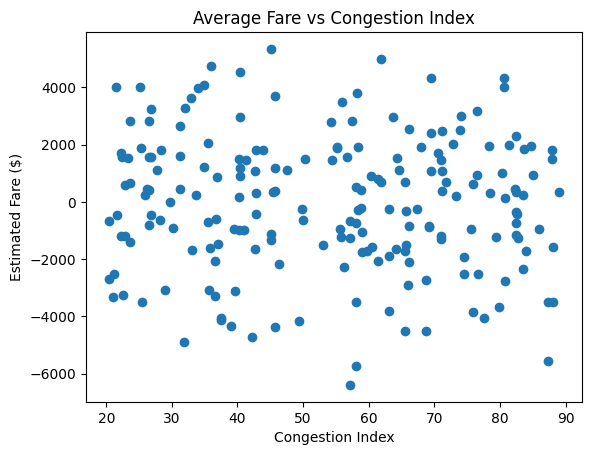

In [31]:
import matplotlib.pyplot as plt

plt.scatter(df_merged['congestion_index'], df_merged['fare_estimated'])
plt.title('Average Fare vs Congestion Index')
plt.xlabel('Congestion Index')
plt.ylabel('Estimated Fare ($)')
plt.show()


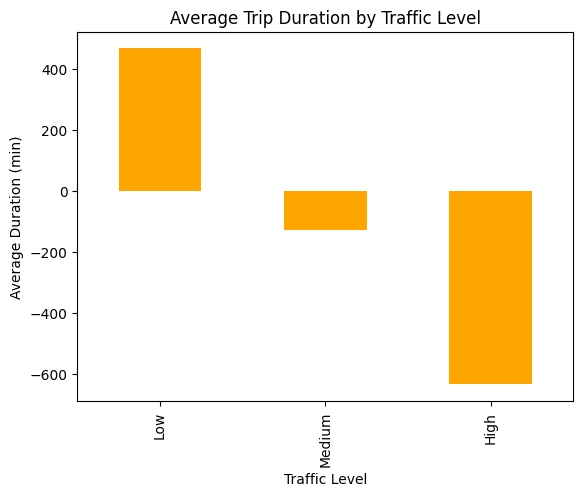

In [34]:
# Create a traffic level column based on congestion index
df_merged['traffic_level'] = pd.cut(
    df_merged['congestion_index'],
    bins=[0, 30, 60, 100],
    labels=['Low', 'Medium', 'High']
)

# Now plot average trip duration by traffic level
avg_duration = df_merged.groupby('traffic_level')['trip_duration_min'].mean()

avg_duration.plot(kind='bar', color='orange')
plt.title('Average Trip Duration by Traffic Level')
plt.xlabel('Traffic Level')
plt.ylabel('Average Duration (min)')
plt.show()


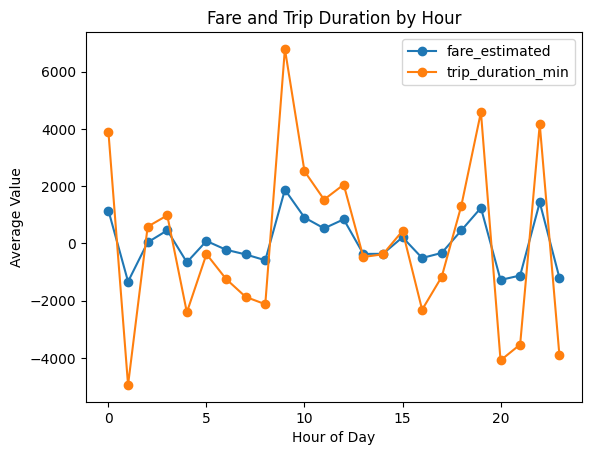

In [33]:
df_merged['hour'] = df_merged['start_time'].dt.hour
avg_data = df_merged.groupby('hour')[['fare_estimated', 'trip_duration_min']].mean()

avg_data.plot(marker='o')
plt.title('Fare and Trip Duration by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.show()


In [40]:
# Fix negative trip duration and fare
df_merged['trip_duration_min'] = df_merged['trip_duration_min'].clip(lower=0)
df_merged['fare_estimated'] = df_merged['fare_estimated'].clip(lower=0)


In [45]:
df_merged.head()

,ride_id,start_time,end_time,pickup_location,drop_location,distance_km,fare_base,fare_per_km,fare_per_min,trip_duration_min,surge_multiplier,fare_estimated,timestamp_x,congestion_index,avg_speed_kmph,timestamp_y,temperature_C,precipitation_mm,humidity_%,wind_speed_kmph,date,event_name,event_location,hour,traffic_level
0,119,2023-01-01 02:00:00,2023-01-07 20:38:00,Airport,City Center,9.67,2.5,1.8,0.25,9758.0,1.0,2459.406,2023-01-01 02:00:00,71.24,19.40,2023-01-01 02:00:00,17.2,5.0,64,14.8,2023-01-01,NaN,NaN,2,High
1,188,2023-01-01 02:00:00,2023-01-02 01:39:00,City Center,Suburbs,4.76,2.5,1.8,0.25,1419.0,1.0,365.818,2023-01-01 02:00:00,71.24,19.40,2023-01-01 02:00:00,17.2,5.0,64,14.8,2023-01-01,NaN,NaN,2,High
2,137,2023-01-01 02:00:00,2023-01-03 12:24:00,Stadium,City Center,18.10,2.5,1.8,0.25,3504.0,1.2,1093.296,2023-01-01 02:00:00,71.24,19.40,2023-01-01 02:00:00,17.2,5.0,64,14.8,2023-01-01,NaN,NaN,2,High
3,185,2023-01-01 03:00:00,2023-01-07 23:40:00,City Center,Airport,8.97,2.5,1.8,0.25,9880.0,2.0,4977.292,2023-01-01 03:00:00,61.91,37.12,2023-01-01 03:00:00,23.0,0.2,63,18.3,2023-01-01,NaN,NaN,3,High
4,34,2023-01-01 07:00:00,2023-01-09 05:31:00,Airport,Stadium,12.99,2.5,1.8,0.25,11431.0,1.5,4325.448,2023-01-01 07:00:00,80.63,32.93,2023-01-01 07:00:00,20.2,5.0,83,19.1,2023-01-01,NaN,NaN,7,High
